# Introduction

Hey guys! This is a short notebook to show you the kind of things we expect from you in the mini-project :)

I'm taking already mostly-prepared data from [there](https://www.kaggle.com/datasets/bhavikjikadara/student-study-performance), writing a couple of functions in `utils.py` to fetch it and then making some visualisation and a bit of modelling on it.

I chose a dataset that records performance for tests in math, reading and writing and characteristics for the students. My aim will be to regress the scores on the students characteristics and try to explain the determinants of the difference between the reading level and the math level. 

In the intro, we expect you to explain:
- What your research question is and why it's relevant
- What dataset you picked and why it's likely to shed light on your research question

# Imports and parameters

These are the imports & parameters for this notebook

In [1]:
from utils import get_student_data, turn_categorical_variables_to_oh
import seaborn as sns
import statsmodels.api as sm

In [2]:
dataset_producer_name = "bhavikjikadara"
dataset_name = "student-study-performance"
file_name = "study_performance.csv"
regressors = ["gender", "parental_level_of_education", "lunch", "test_preparation_course"]

# Data acquisition and processing

I'm using the [kaggle API](https://www.kaggle.com/docs/api) to get the data. Then, I read it with pandas and one-hot encode all the categorical variables I'm going to use in my regression. When one-hot encoding, I drop a value each time to avoid multicolinearity: it will be the reference value when interpreting the regression. 

In this section, we expect you to explain:
- How you merged your data if applicable
- What kind of processing you did and why (part of the reason can be "because this is a small-scale project, if I had more time I'd do X or Y")

In [3]:
student_data, oh_encoded_variable_names = get_student_data(dataset_producer_name, dataset_name, file_name, regressors)

100%|██████████| 8.70k/8.70k [00:00<00:00, 121kB/s]


Reference value for categorical regressor gender: ['female']
Reference value for categorical regressor parental_level_of_education: ["associate's degree"]
Reference value for categorical regressor lunch: ['free/reduced']
Reference value for categorical regressor test_preparation_course: ['completed']


# Visualisation

Here, I'm just showing a single chart to show you the standards we expect. When you work on your project, try a couple of approaches and show us a chart that tells a compelling story! Here are a couple of examples of angles you could take:
- These explanatory variables are correlated in a way that I find interesting because...
- There is a clear relationship between your dependent variables and variables x1 and x2
- Or, on the contrary, the signal here is muddled in a way that is going to be challenging during modelling (similar to the first graph in the modelling class showing that classes 2 and 3 of irises shared similar features)
- If you have a chronological variable, you could plot it and see if there seems to be an event that drastically changed its trend

And so on, these are just examples. If you found a lot of interesting things, try to limit yourself to the 2-3 most relevant charts.

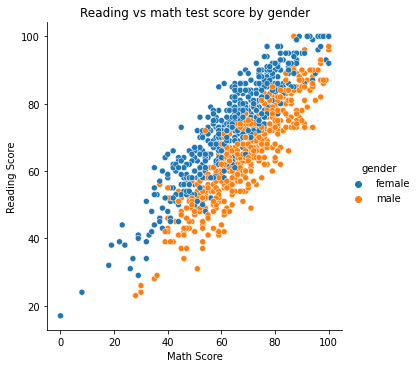

In [4]:
sns.relplot(
    data=student_data, 
    x="math_score", 
    y="reading_score", 
    hue = "gender"
).set(
    title='Reading vs math test score by gender'
).set_axis_labels(
    "Math Score", "Reading Score"
)

# Modelling

In this final step, I'm putting my regression together and showing the results. 

In [14]:
model = sm.OLS(
    student_data["reading_score"] - student_data["math_score"],
    student_data[oh_encoded_variable_names]
).fit()

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.375
Model:                            OLS   Adj. R-squared (uncentered):              0.370
Method:                 Least Squares   F-statistic:                              74.44
Date:                Sun, 17 Mar 2024   Prob (F-statistic):                    5.67e-96
Time:                        16:19:18   Log-Likelihood:                         -3436.5
No. Observations:                1000   AIC:                                      6889.
Df Residuals:                     992   BIC:                                      6928.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
gender_male                                      -9.5236      0.454    -20.957      0.000     -10.415      -8.632
parental_level_of_education_bachelor's degree     6.7544      0.776      8.706      0.000       5.232       8.277
parental_level_of_education_high school           6.0113      0.660      9.103      0.000       4.715       7.307
parental_level_of_education_master's degree       7.9413      1.040      7.636      0.000       5.900       9.982
parental_level_of_education_some college          5.4853      0.620      8.853      0.000       4.270       6.701
parental_level_of_education_some high school      6.9106      0.663     10.423      0.000       5.609       8.212
lunch_standard                                    0.0488      0.448      0.109      0.913      -0.830       0.928
test_preparation_course_none                      2.0717      0.450      4.601      0.000       1.188       2.955
==============================================================================
Omnibus:                        3.602   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.165   Jarque-Bera (JB):                3.516
Skew:                           0.112   Prob(JB):                        0.172
Kurtosis:                       3.184   Cond. No.                         5.66
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusion

In the conclusion, you should interpret your model in this kind of fashion: 

- My model is overall significant at the 0.001 level (the p-value for the F-test is really low). 
- Gender, parental level of education and having followed a test-preparation course are all significant at the 0.001 level
  - Gender boasts both the strongest coefficient and the lowest standard deviation: as suggested by the chart, men is this sample tend to be better at math than reading, and the opposite holds true for women. 
  - For parental level of education, the findings are a bit hard to interpret. The reference value is "associate degree", which is more schooling than high school/some high school, but less than some college/bachelor's/master's. However, all coefficients are significantly positive. It seems that the relationship between parent schooling and gap between reading and math performance is non-linear. 
    - There could be a story there about people with an average level of schooling putting a lot of emphasis on math as a way to secure a well-paid position for their children?
    - You'd need to compare these results to education economics findings, and especially some findings in the area where the study was conducted, to understand the story more accurately.
  - Having done the test preparation course seems to play a moderately positive role in understanding the difference between reading and math performance. To dig deeper, one would need to understand how a person is placed in these courses. 
- Not having a reduced-price lunch seem to play little to no role in how much better you perform in reading vs math (unsignificant coefficient)

It's also great if you can point out weaknesses in your reasoning: is your problem likely to be endogeneous? Are there glaring missing variables? Are there some variables that you don't understand very well (like our "test preparation course" in this case)?